# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('diabetes.csv')


In [97]:
missing_values = df.isnull().sum()
print(missing_values)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [98]:
# Calculate the median for each column, excluding zeros
median_skinthickness = df[df['SkinThickness'] > 0]['SkinThickness'].median()
median_bloodpressure = df[df['BloodPressure'] > 0]['BloodPressure'].median()
median_bmi = df[df['BMI'] > 0]['BMI'].median()
median_insulin = df[df['Insulin'] > 0]['Insulin'].median()

# Replace zero values with the median in 'SkinThickness', 'BloodPressure' and 'BMI' because they're not possible to be 0
df['SkinThickness'] = df['SkinThickness'].replace(0, median_skinthickness)
df['BloodPressure'] = df['BloodPressure'].replace(0, median_bloodpressure)
df['BMI'] = df['BMI'].replace(0, median_bmi)
df['Insulin'] = df['Insulin'].replace(0, median_insulin)

In [99]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


'Diabetes Pedigree Function' = Higher values of this function indicate a higher genetic predisposition to developing diabetes.

/Users/akumanic/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


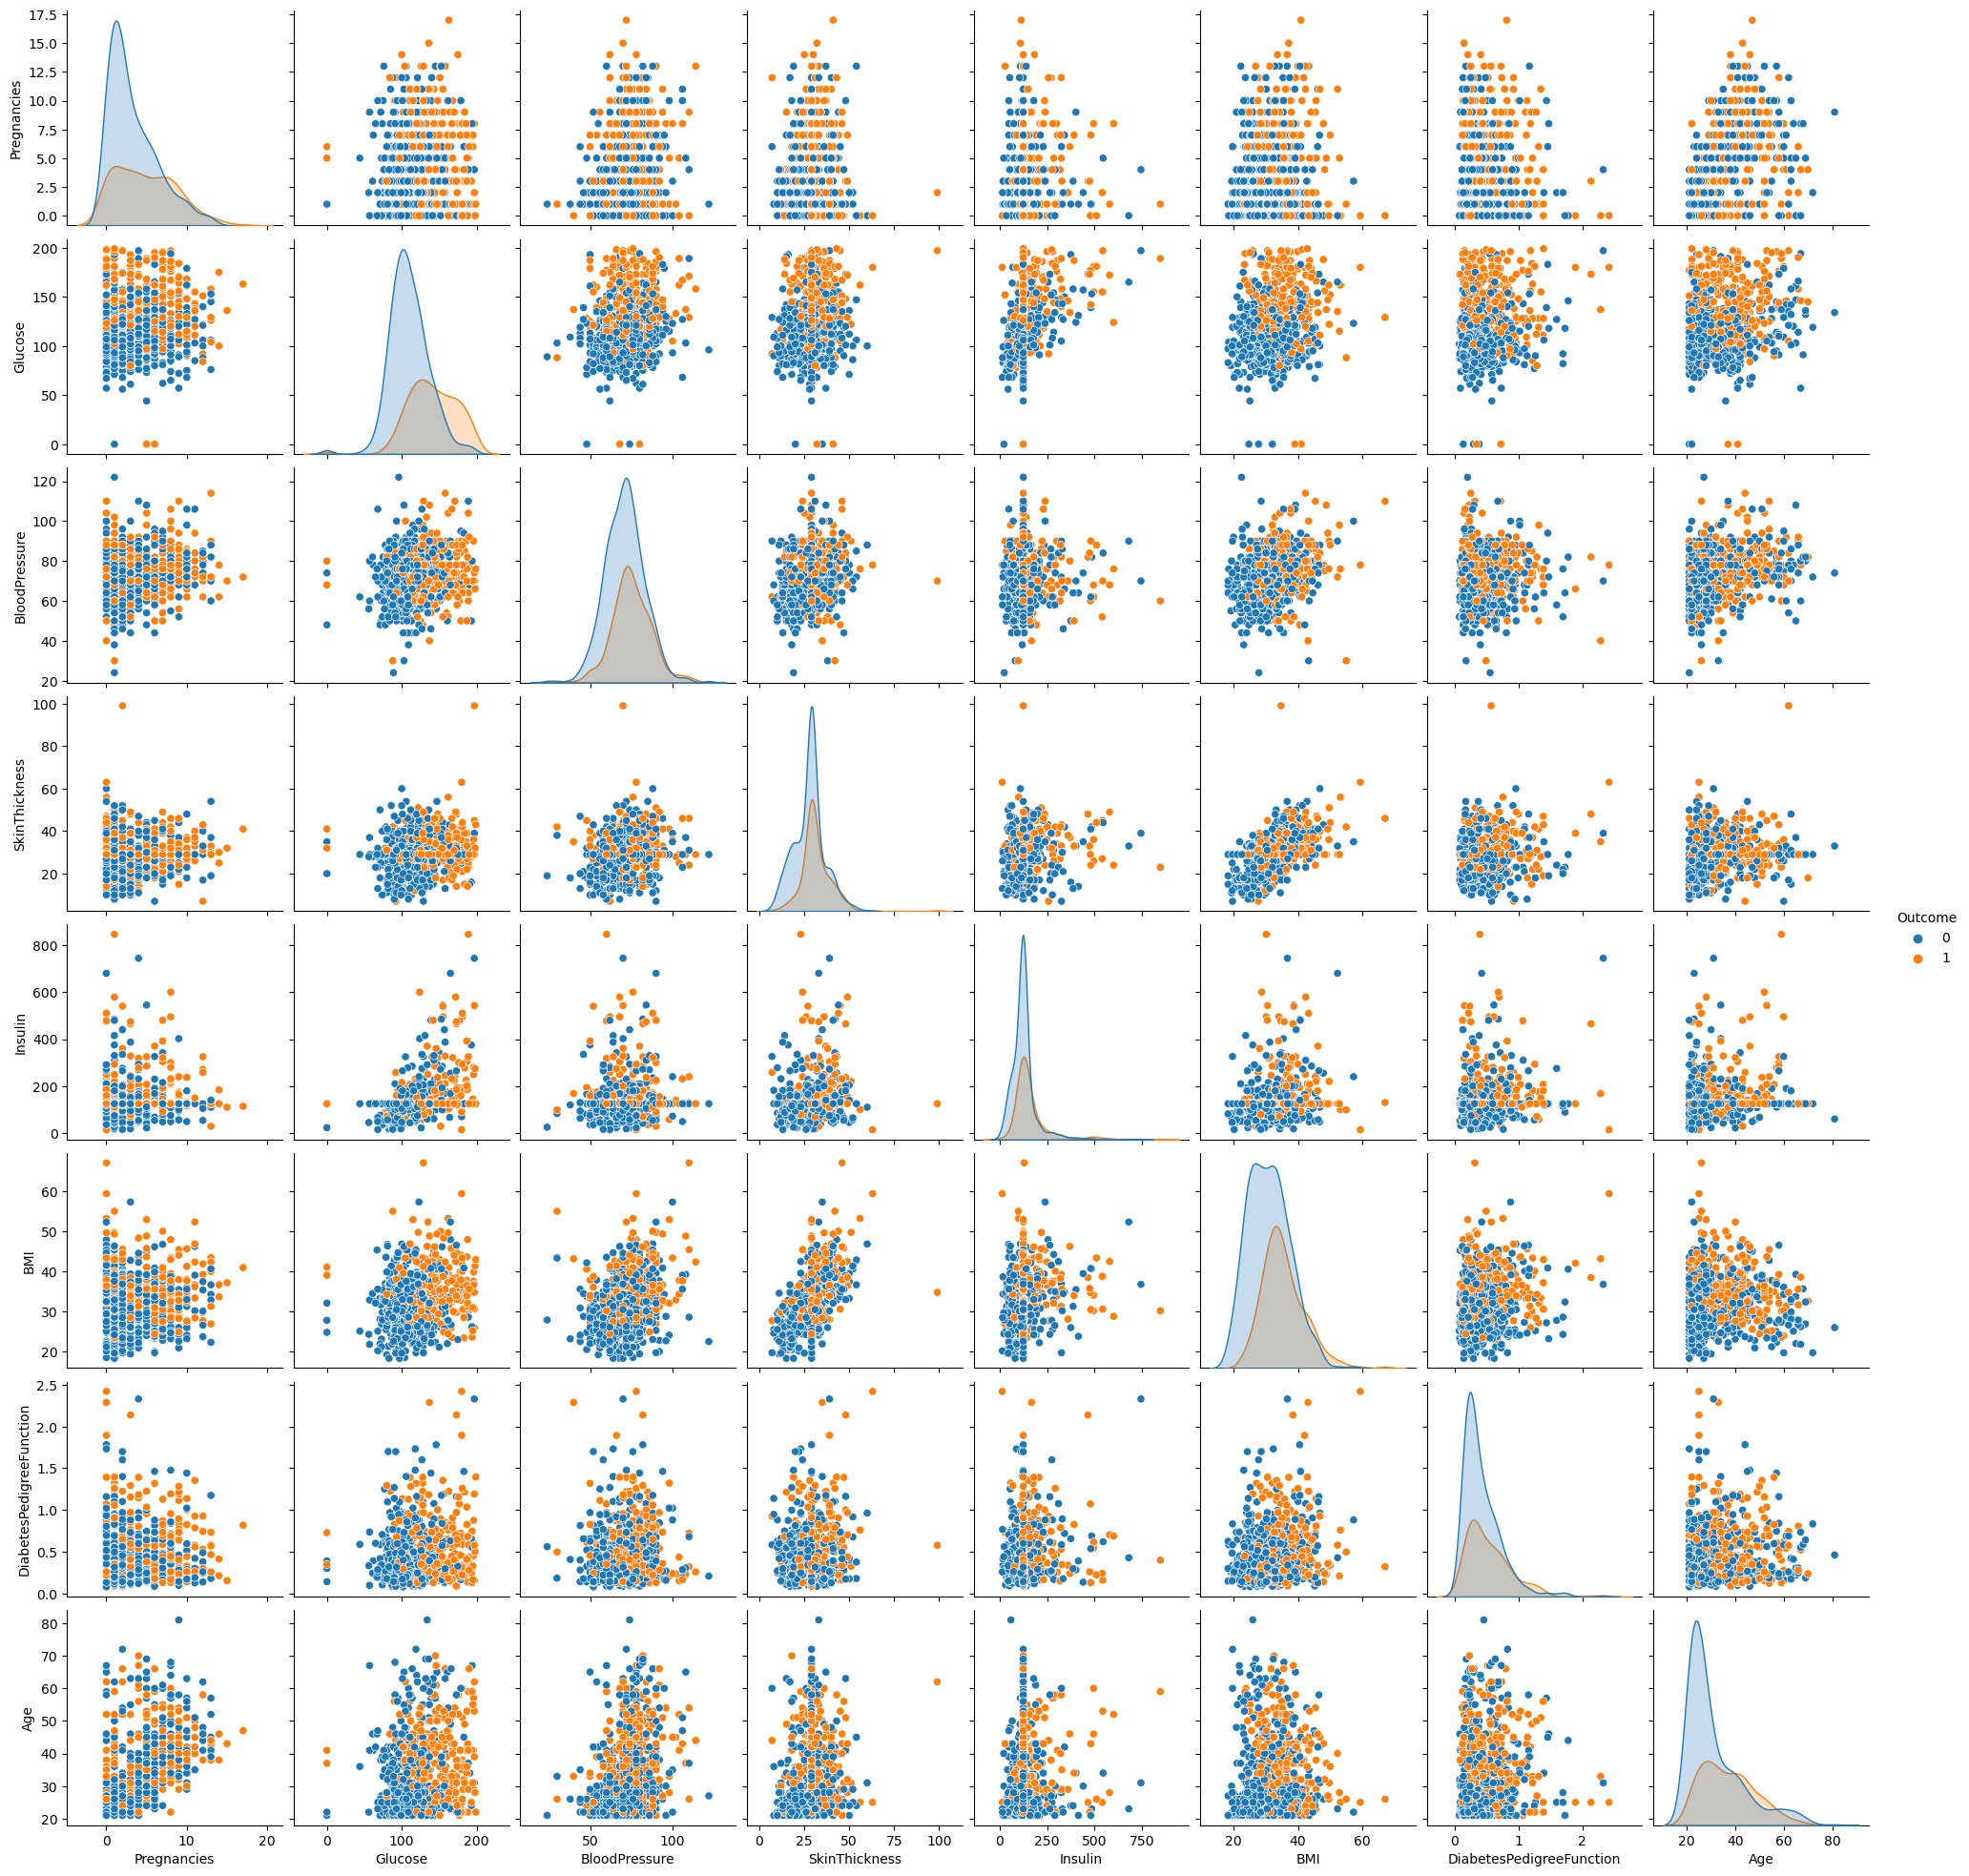

In [100]:
sns.pairplot(df, hue='Outcome')

<Axes: >

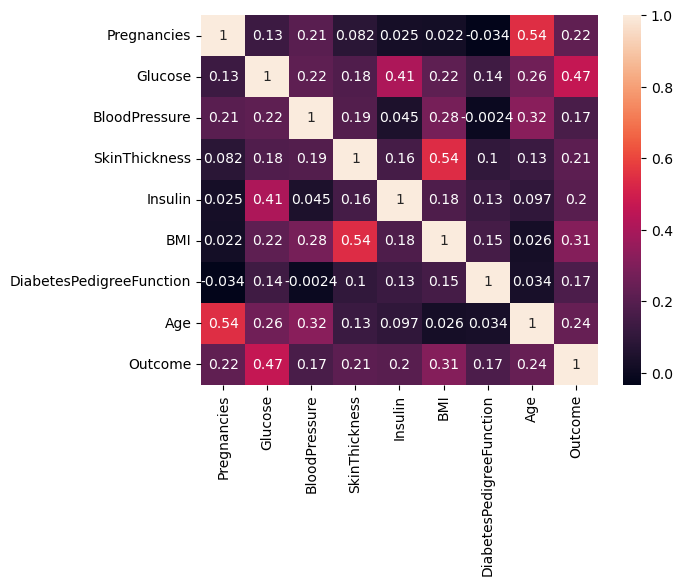

In [101]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

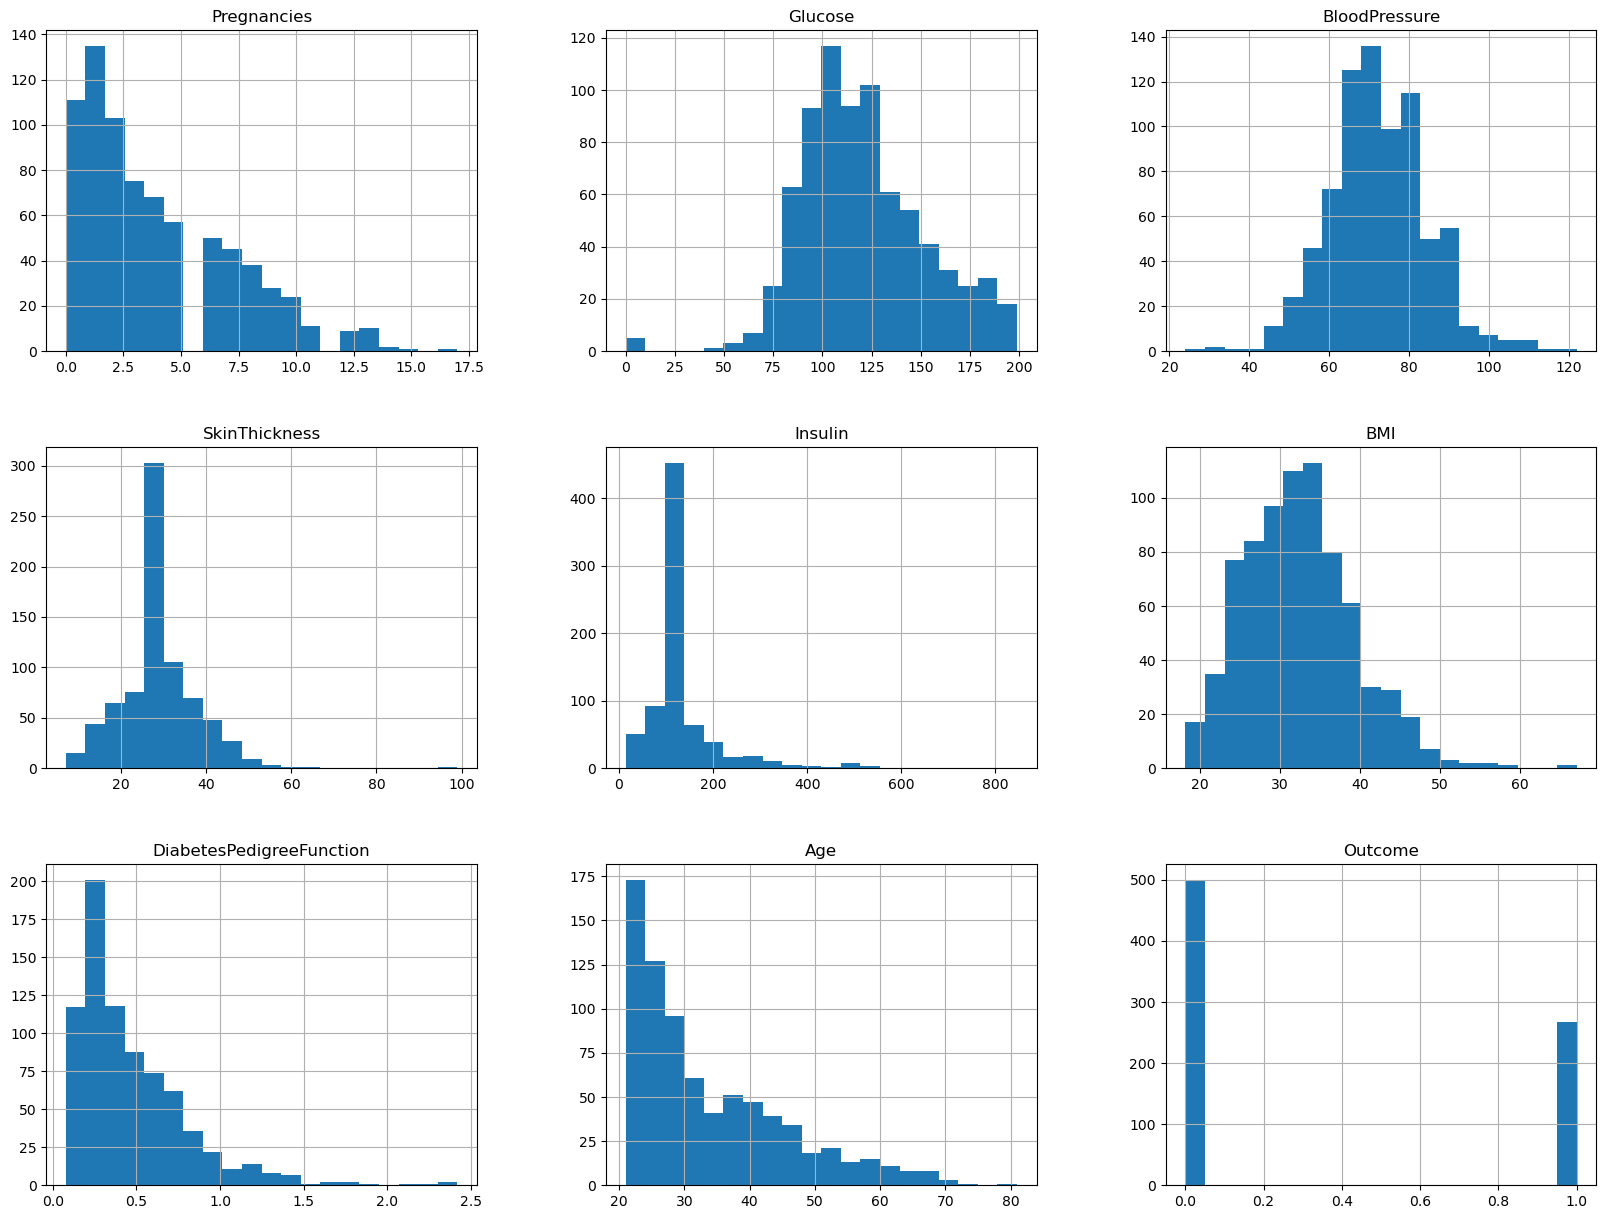

In [102]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

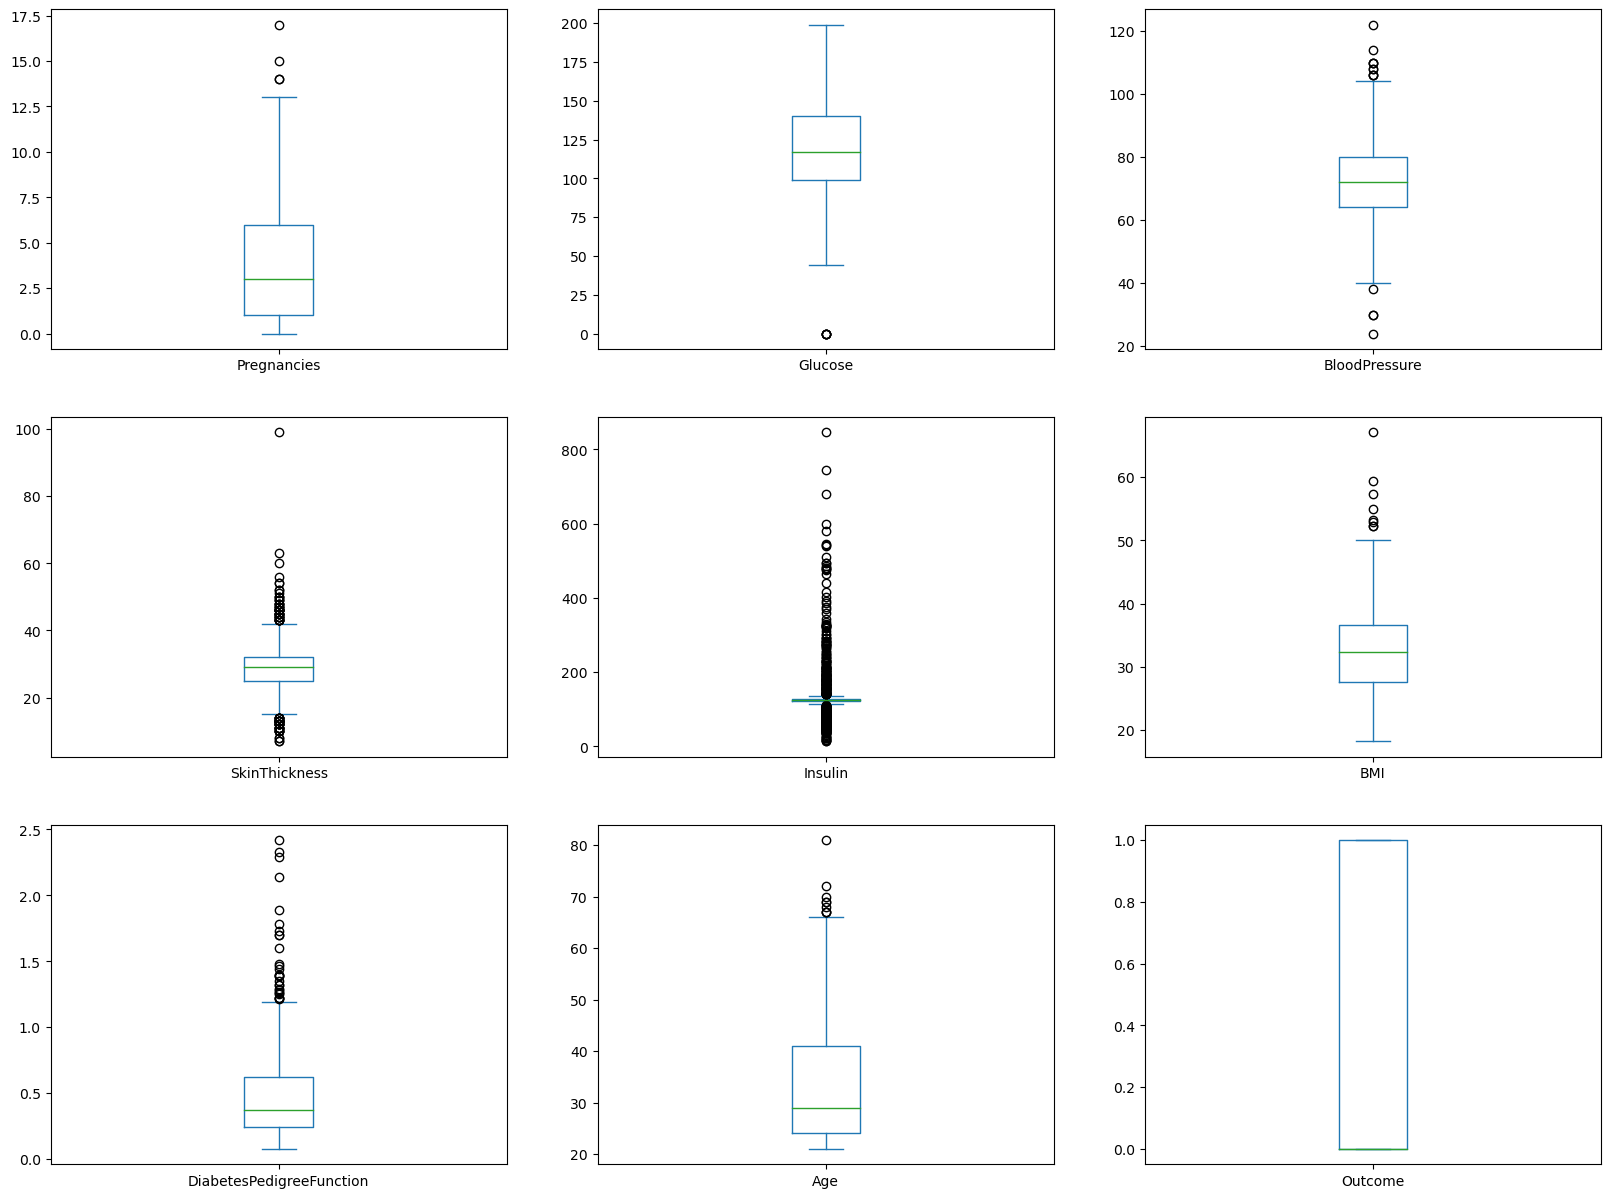

In [103]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

In [104]:
average_age = df['Age'].mean()
print(average_age)

33.240885416666664


In [105]:
average_glucose = df.groupby('Outcome')['Glucose'].mean()
print(average_glucose)

Outcome
0    109.980000
1    141.257463
Name: Glucose, dtype: float64


In [106]:
# Filter out the rows where BMI is zero
df_filtered = df[df['BMI'] > 0]
df_filtered = df[df['SkinThickness'] > 0]
df_filtered = df[df['BloodPressure'] > 0]

# Compute the average for each outcome group, now excluding zeroes
average_bmi = df_filtered.groupby('Outcome')['BMI'].mean()
average_SkinThickness = df_filtered.groupby('Outcome')['SkinThickness'].mean()
average_BloodPressure = df_filtered.groupby('Outcome')['BloodPressure'].mean()

print(average_bmi)
print(average_SkinThickness)
print(average_BloodPressure)


Outcome
0    30.885600
1    35.383582
Name: BMI, dtype: float64
Outcome
0    27.726000
1    31.686567
Name: SkinThickness, dtype: float64
Outcome
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64


In [107]:
# Creating new columns using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Age_BMI'] = df['Age'] * df['BMI']

# And log
df.loc[:, 'Log_Insulin'] = np.log(df['Insulin'] + 1)


In [108]:
pip install -U scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values - Done in part I
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Capping
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


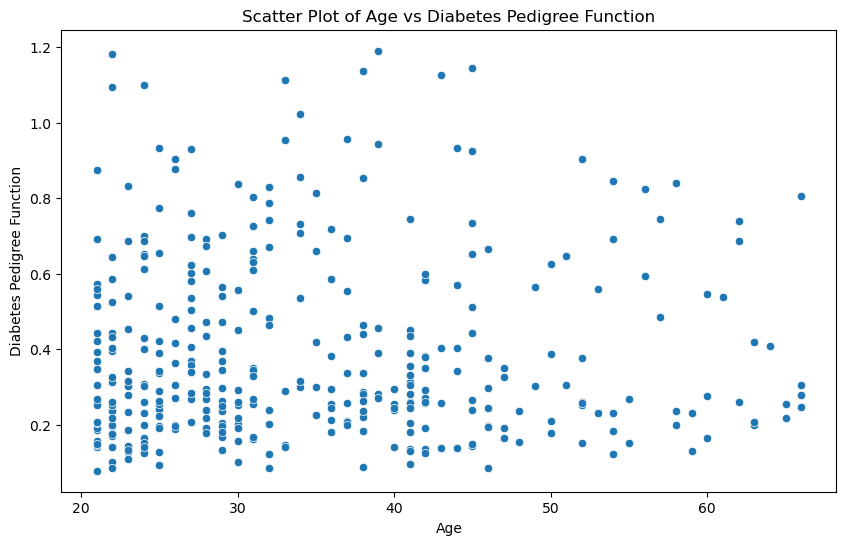

In [ ]:
# My hypothesis: There would be no correlation between the age and genetic float. I would verify this by:
# Visualizing the relationship between 'Age' and 'DiabetesPedigreeFunction'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=df)
plt.title('Scatter Plot of Age vs Diabetes Pedigree Function')
plt.xlabel('Age')
plt.ylabel('Diabetes Pedigree Function')
plt.show()

    

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'Outcome' is the target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

# Generating a classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")


              precision    recall  f1-score   support

           0       0.32      0.21      0.25        38
           1       0.40      0.54      0.46        37

    accuracy                           0.37        75
   macro avg       0.36      0.38      0.36        75
weighted avg       0.36      0.37      0.36        75

Confusion Matrix:
[[ 8 30]
 [17 20]]
ROC AUC Score: 0.3755334281650071


There is significant room for improvement

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

CV_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
CV_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", CV_rf.best_params_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to calculate metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
evaluate_model(log_reg, X_test, y_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier Metrics:")
evaluate_model(rf_classifier, X_test, y_test)


Logistic Regression Metrics:
Accuracy: 0.48
Precision: 0.4857142857142857
Recall: 0.918918918918919
F1 Score: 0.6355140186915889
ROC AUC Score: 0.4857752489331437

Random Forest Classifier Metrics:
Accuracy: 0.37333333333333335
Precision: 0.4
Recall: 0.5405405405405406
F1 Score: 0.45977011494252873
ROC AUC Score: 0.3755334281650071


In [110]:
# Retraining RandomForest with the best parameters
optimized_rf = RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt', n_estimators=100, random_state=42)
optimized_rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=4, random_state=42)

In [111]:
# Evaluate the optimized model
y_pred_optimized = optimized_rf.predict(X_test)

# Generating a classification report
print(classification_report(y_test, y_pred_optimized))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))

# ROC-AUC Score
roc_auc_optimized = roc_auc_score(y_test, y_pred_optimized)
print(f"ROC AUC Score: {roc_auc_optimized}")


              precision    recall  f1-score   support

           0       0.27      0.08      0.12        38
           1       0.45      0.78      0.57        37

    accuracy                           0.43        75
   macro avg       0.36      0.43      0.35        75
weighted avg       0.36      0.43      0.35        75

Confusion Matrix:
[[ 3 35]
 [ 8 29]]
ROC AUC Score: 0.4313655761024182


The current performance of both models suggests there is significant room for improvement. It's worth trying other methods for better performance. Sometimes, it's not just about tweaking the model but also about understanding and preparing data better. I went back to adjust some of the data as well.

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.



>The EDA revealed several data quality issues, such as implausible zero values in 'SkinThickness', 'BloodPressure', 'BMI', and 'Insulin' columns, which were addressed through appropriate imputation strategies. This preprocessing step was crucial for ensuring the accuracy and reliability of the subsequent analysis.
Feature Relationships and Importance:

>The analysis highlighted no significant correlation between 'Age' and 'Diabetes Pedigree Function', suggesting that genetic predisposition (as measured by the Diabetes Pedigree Function) does not strongly correlate with age in this dataset. This insight can be vital for understanding the dynamics of diabetes risk factors.
Model Performance and Comparison:

>Among the machine learning models developed, the RandomForest Classifier, after hyperparameter optimization, showed potential for improved performance compared to the baseline Logistic Regression model. However, both models initially struggled with accuracy and ROC AUC scores, indicating the need for further model tuning and possibly more advanced feature engineering.


>Handling Imbalanced Data: The application of techniques like SMOTE (Synthetic Minority Over-sampling Technique) for handling imbalanced data in the dataset was an essential step. It helped in creating a more balanced dataset, which is critical for improving the performance of machine learning models in binary classification tasks, especially when dealing with medical datasets where outcome classes can be naturally imbalanced.